In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run -i wave_funcs.py 

drv = 'C:'
pdir = drv+'/crs/proj/2022_runup/'

In [3]:
1/.04

25.0

np: 21
[0.02411693 0.02643115 0.02896744 0.0317471  0.0347935  0.03813222
 0.04179132 0.04580154 0.05019657 0.05501335 0.06029233 0.06607788
 0.07241859 0.07936775 0.08698374 0.09533055 0.1044783  0.11450385
 0.12549144 0.13753337]
[0.02411693 0.02527404 0.02769929 0.03035727 0.0332703  0.03646286
 0.03996177 0.04379643 0.04799906 0.05260496 0.05765284 0.0631851
 0.06924823 0.07589317 0.08317575 0.09115714 0.09990442 0.10949107
 0.11999764 0.1315124  0.13753337]
5.153805174540507 5.2702880854372545 5.151862800503691 5.0346279952682815 5.2702880854372545
5.034627995268282


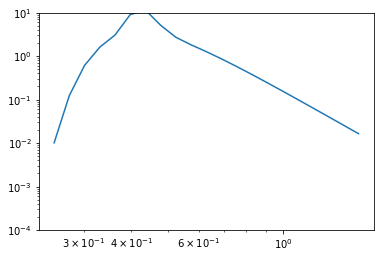

In [6]:
# make a frequency spectrum in sea-swell (SS) band
wlo = 2.*np.pi/25.
whi = 2.*np.pi/4.

# experimenting with the best way to integrate
# (linspace is bad)
w = np.geomspace(wlo, whi, 21)

n = len(w)
print('np:', n)
T = 2.*np.pi/w
f = 1./T
dw = np.diff(w)
print(dw)

delw = np.zeros_like(w)
delw[1:-1]=0.5*(dw[0:-1]+dw[1:])
delw[0]=dw[0]
delw[-1]=dw[-1]
print(delw)
delw2 = np.zeros_like(w)
delw2[1:-1]=0.5*(dw[0:-1]+dw[1:])
delw2[0]=dw[0]/2.
delw2[-1]=dw[-1]/2.

dw1 = np.append(dw[0], dw)
dw2 = np.append(dw, dw[-1])

js = jonswap(w, 5., 15.)
plt.loglog(w,js)
plt.ylim(10**-4,10)
Hst = 4.*np.sqrt( np.trapz(js, w) ) # this produces same aswer as next one
Hs = 4.*np.sqrt( np.sum(js*delw) )  # this halves dw at the endpoints, but somehow overpredicts
Hs2 = 4.*np.sqrt( np.sum(js*delw2) )  # this is fancier delw, but same as tra
Hs1 = 4.*np.sqrt( np.sum(js*dw1) )  # this is best result
Hs2 = 4.*np.sqrt( np.sum(js*dw2) )  # this is worst result

print(Hs, Hs2, Hst, Hs1, Hs2)

# check integration using f
dff = np.diff(f)
df = np.append(dff[0], dff)
Hsf = 4.*np.sqrt( np.sum(2.*np.pi*js*df))
print(Hsf)